In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [12]:
def getPixel(img, center, x, y):
    value = 0
    try:
        if img[x][y] >= center:
            value = 1
    except:
        pass
    return value

In [13]:
def calculLBP(img, x, y):
    center = img[x][y]
    valueArray = []
    valueArray.append(getPixel(img, center, x-1, y+1))     # top_right
    valueArray.append(getPixel(img, center, x, y+1))       # right
    valueArray.append(getPixel(img, center, x+1, y+1))     # bottom_right
    valueArray.append(getPixel(img, center, x+1, y))       # bottom
    valueArray.append(getPixel(img, center, x+1, y-1))     # bottom_left
    valueArray.append(getPixel(img, center, x, y-1))       # left
    valueArray.append(getPixel(img, center, x-1, y-1))     # top_left
    valueArray.append(getPixel(img, center, x-1, y))       # top
    
    factorArray = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(valueArray)):
        val += valueArray[i] * factorArray[i]
    return val 

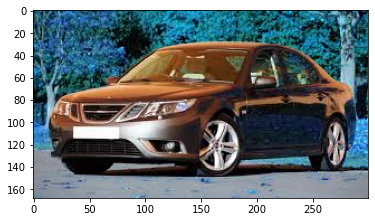

In [14]:
img = cv2.imread('car.jpg')
height, width, channel = img.shape
plt.imshow(img, cmap='gray')

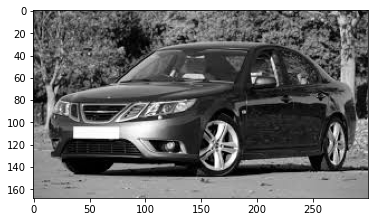

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [16]:
lbp = np.zeros((height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        lbp[i, j] = calculLBP(gray, i, j)

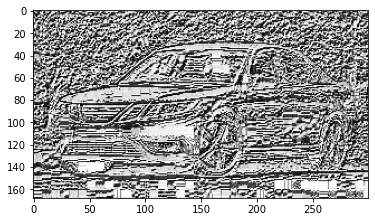

In [17]:
result = Image.fromarray(lbp, 'RGB')
plt.imshow(result, cmap='gray')